**Credit:** Laura Toma, 3/26/2021, updated 10/19/2022

## Dynamic programming: The rod cutting problem

Consider the rod cutting problem as discussed in class:  We are given a long steel rod and we need to cut it into smaller pieces which we then sell.  Making a cut is free, and the rod lengths  are always integers.  Assume we are given a table with sale prices: for each i=1, 2, 3, ..., n,   p[i] is the sale price for a rod of length i. 

Goal: Given a rod of length n and a price table p[], determine the maximal revenue obtainable by cutting up the rod and selling the pieces. 

For examples, consider the case when:  n=10 and  p = [0, 1, 5, 8, 9, 19, 17, 17, 20, 24, 30]

In [1]:
n=10
p = [0,1,5,8,9,19,17,17,20,24,30]


### Notation and the choice of subproblem


Let maxrev(n) denote the maximal revenue obtainable from a rod of length n, given the price table. 

Since the price table does not change, we don't need to include it as a parameter and could instead have it as a global variable. However good programming style discourages the use of globals  ("globals are evil"), so we chose to pass  it as a parameter. 

In [2]:
# takes an integer n (length of rod) and a price table
# returns the maximal revenue obtainable by cutting the rod
def maxrev(n, price): 
    if n==0: return 0
    if n==1: return price[1]
    #else 
   
    #initialize table rev[] that will store all options 
    rev=[0 for i in range(n+1)]
    
    for i in range(1, n+1): 
        #make first cut at distance i and store the revenue in rev[i]
        rev[i] = price[i] + maxrev(n-i, price)
    
    return max(rev)


Let's do a sanity check: 

In [3]:
for i in range(11): 
    print("maxrev(", i, ")=", maxrev(i, p))


maxrev( 0 )= 0
maxrev( 1 )= 1
maxrev( 2 )= 5
maxrev( 3 )= 8
maxrev( 4 )= 10
maxrev( 5 )= 19
maxrev( 6 )= 20
maxrev( 7 )= 24
maxrev( 8 )= 27
maxrev( 9 )= 29
maxrev( 10 )= 38


What is the running time of maxrev(n) as written above? 

## Rod cutting solution  with dynamic programming 

Let's write code to compute maxrev(n) with dynamic programming, both top-down and bottom-up. We'll plot them and compare them with the brute-force recursive version. 


### Top down (recursive)  with memo-ization 



In [4]:
#DP topdown uses a table 
#we have two options on: 
#    option 1: make the table a global variable 
#
#or, option2:  make maxrev(n)  take the table as an additional parameter.       
#              In this case we'll need to create a helper function that takes the table 
#              as a parameter. Note that the table is passed along in the recursion 
#              so it is essentially shared by all subproblems
#Using global variables is  in general poor programming style so we choose option 2     


INITIAL_VALUE = -1

# takes an integer n (length of rod) and a price table
# returns the maximal revenue obtainable by cutting the rod
def maxrevDP_topdown(n, price): 
    #if n==0: return 0    <--- we can put this here, but not necessary 
    #if n==1: return p[1] <--- we can put this here, but not necessary 
    #else 
    #create and initialize an array to store solutions to subproblems 
    table = [ INITIAL_VALUE for i in range(n+1)]
    
    return maxrevDP_helper(n, price, table)


def maxrevDP_helper(n, price, table): 

    #if this has already been compute, retrieve it 
    if table[n] != INITIAL_VALUE: 
        #print("got it from the table")
        return table[n]
   
    #else: this is the first call to this subproblem. Solve it and store it 
    if n==0: 
        table[0] = 0
        return table[0]
    #else 
    rev=[0 for i in range(n+1)]
    for i in range(1, n+1): 
        #make first cut at distance i
        rev[i] = price[i] + maxrevDP_helper(n-i, price, table)
        
    table[n] = max(rev)
    return table[n]

    

In [5]:
for  i in range(1, 11): 
    print(maxrevDP_topdown(i, p))

1
5
8
10
19
20
24
27
29
38


For this particular case, how many times is an entry retrieved from the table? 


### Bottom-up (iterative) 


In [6]:
# takes an integer n (length of rod) and a price table
# returns the maximal revenue obtainable by cutting the rod
def maxrevDP_bottomup(n, price): 
    #create and initialize an array to store solutions to subproblems 
    table = [ INITIAL_VALUE for i in range(n+1)]
    table[0] = 0 
    
    for k in range(1, n+1):
        # compute maxrev(k) and store it in table[k]
        rev=[0 for i in range(k+1)]
        for i in range(1, k+1): 
            #make first cut at distance i
            rev[i] = price[i] + table[k-i]
        table[k] = max(rev)
   
    return table[n]


In [7]:
for  i in range(1, 11): 
    print(maxrevDP_bottomup(i, p))

1
5
8
10
19
20
24
27
29
38


## Empirical evaluation

In [8]:
# set up matplotlib, for plotting stuff.
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import time
from random import choice

# runIt: runs myFun function numTrials and times how long it takes on the average.
#
# Input: myFn: a function which takes as input an  integer and an array 
#        n: myFun is run on 1, 2, 3, ..., n
#       
# Returns: nValues, tValues, where running myFun with argument nValues[i] took  tValues[i] milliseconds.
#
def runIt(myFun, n, price, numTrials=10):
    nValues = []
    tValues = []
    for k in range(n):
        # run myFn several times and average to get a decent idea.
        runtime=0
        for i in range(numTrials):
            start = time.time()
            myFun(k, price)
            end = time.time()
            runtime += (end - start) * 1000 # measure in milliseconds
        
        runtime /= numTrials
        nValues.append(k)
        tValues.append(runtime)
    return nValues, tValues



Text(0.5, 1.0, 'Rod cutting numbers')

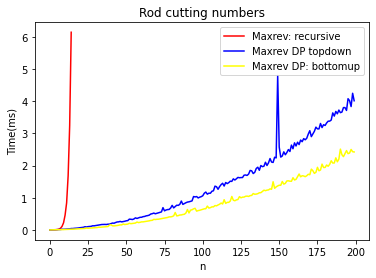

In [10]:
##some prices
p = [i for i in range(101000)]

# run maxrev without DP. Careful to put a small value of n, because for large values it takes forever
nValues, tValues = runIt(maxrev, 15, p, 5)

#run maxrevDP_topdown 
nValuesDP1, tValuesDP1 = runIt(maxrevDP_topdown, 200, p)

#run maxrevDP_bottomup
nValuesDP2, tValuesDP2 = runIt(maxrevDP_bottomup, 200, p)

#plot the running times  
plt.plot(nValues, tValues, color="red", label="Maxrev: recursive")
plt.plot(nValuesDP1, tValuesDP1, color="blue", label="Maxrev DP topdown")
plt.plot(nValuesDP2, tValuesDP2, color="yellow", label="Maxrev DP: bottomup")


plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Rod cutting numbers")



What conclusion can you draw? 


## Finding the full solution

Finally, we want to extend the solution above in order to compute the actual set of cuts  corresponding to the maximum revenue. 

In general we can choose to extend either the top-down or the bottom-up solution. 


The code below extends the top-down solution.  The bodies of two functions are missing.  Fill in the missing part so that you can see the set of cuts. 

In [28]:
INITIAL_VALUE = -1
# takes an integer n (length of rod) and a price table
# finds the maximal revenue obtainable by cutting the rod and prints out the set of cuts 
def maxrevDP_topdown_fullsolution(n, price): 
   
    #create a table that stores the max revenue 
    table_rev = [ INITIAL_VALUE for i in range(n+1)]

    #create an additional table, which stores the optimal choices
    table_choice = [ INITIAL_VALUE for i in range(n+1)]

    #compute 
    maxrevDP_helper_fullsolution(n, price, table_rev, table_choice)
    
    print("the maximum revenue is: ", table_rev[n])
    
    #traverse the tables and figure out the set of cuts corresponding to the max. revenue 
    return find_solution(n, table_choice)
    

def maxrevDP_helper_fullsolution(n, price, table_rev, table_choices): 
    #add your code here
    return 0;
    
def find_solution(n, table_choice):
    #add your code here 
    return 0; 
    

In [29]:
n=10
p = [0,1,5,8,9,19,17,17,20,24,30]
maxrevDP_topdown_fullsolution(10, p)

the maximum revenue is:  -1


0